# `Exploratory data Analysis on Churn Modelling`

### Loading the dataset

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [271]:
data=pd.read_csv('Churn_Modelling.csv')

In [272]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [273]:
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [274]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [275]:
data.shape

(10000, 12)

#### `correlation matrix`

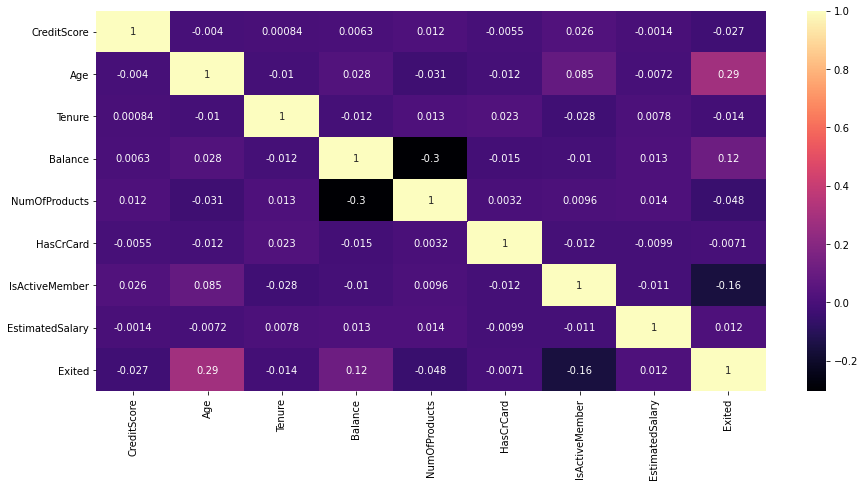

In [276]:
plt.figure(figsize=(15,7))
corr_mat = data.corr()

sns.heatmap(corr_mat,annot=True,cmap='magma')
plt.show()

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


---

## `Univariate Analysis`

---

### `Catagorical`
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products

### Geography

In [277]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

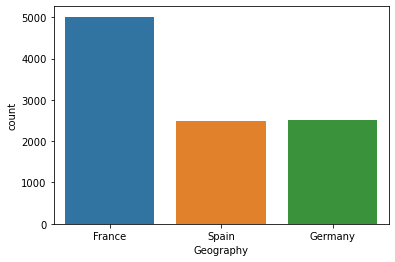

In [278]:
sns.countplot(data['Geography'])

#### `France has maximum customers`

### Gender

In [279]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

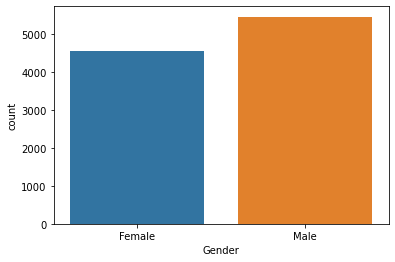

In [280]:
sns.countplot(data['Gender'])

#### `Maximum customers are of Gender Male`

### Has Credit Card

In [281]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

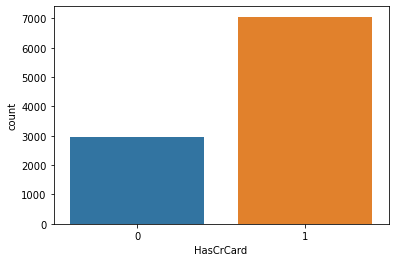

In [282]:
sns.countplot(data['HasCrCard'])

#### `Max customers have credit card`

### IsActiveMember

In [283]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

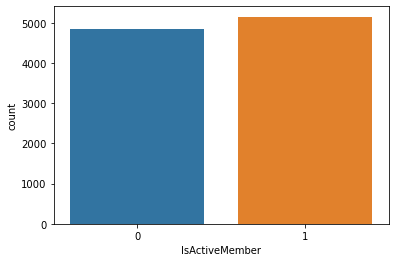

In [284]:
sns.countplot(data['IsActiveMember'])

#### `Maximum customers are active customers`

### Exited

In [285]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

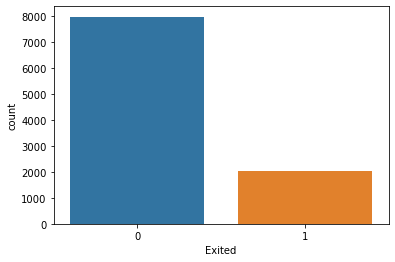

In [286]:
sns.countplot(data['Exited'])

#### `Maximum customers are not going to churn`

### Tenure

In [287]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0, 0.5, 'Number of Customers')

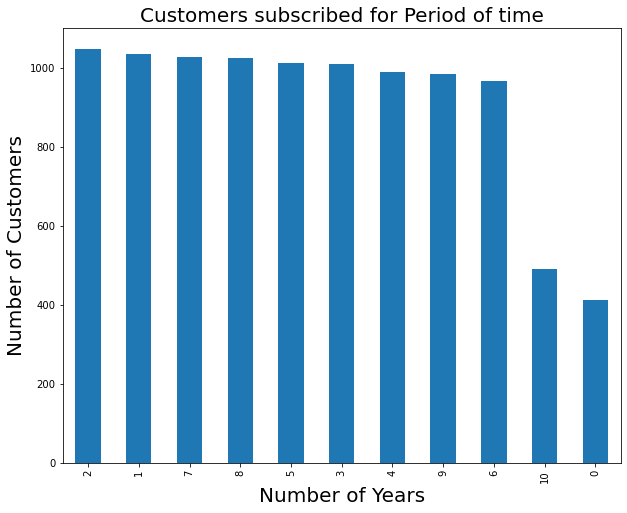

In [288]:
plt.figure(figsize=(10,8))
data['Tenure'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Customers subscribed for Period of time',fontsize=20)
plt.xlabel('Number of Years',fontsize=20)
plt.ylabel('Number of Customers',fontsize=20)

#### `These customers had subscribed for a good amount of time`

### No of Products

Text(0.5, 1.0, 'Customers subscribed for Products')

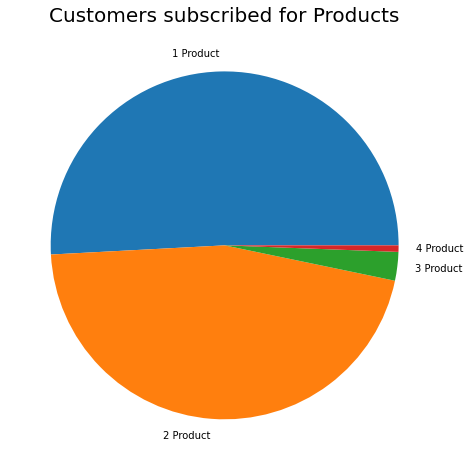

In [289]:
plt.figure(figsize=(10,8))
plt.pie(data['NumOfProducts'].value_counts(),labels=['1 Product','2 Product','3 Product','4 Product']);
plt.title('Customers subscribed for Products',fontsize=20)

In [290]:
print(f'{5084/100}% Customers subscribed for 1 product')
print(f'{4590/100}% Customers subscribed for 2 products')
print(f'{266/100}% Customers subscribed for 3 products')
print(f'{60/100}% Customers subscribed for 4 products')

50.84% Customers subscribed for 1 product
45.9% Customers subscribed for 2 products
2.66% Customers subscribed for 3 products
0.6% Customers subscribed for 4 products


### `Numerical`
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary

### CreditScore

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

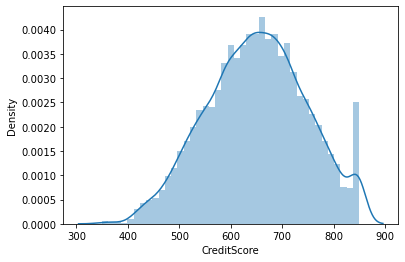

In [291]:
sns.distplot(data['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

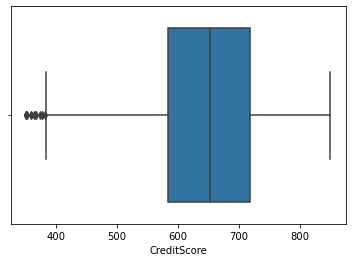

In [292]:
sns.boxplot(data['CreditScore'])

In [293]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

#### `Population has a mean CreditScore of 650`

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

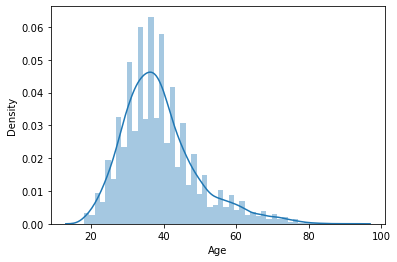

In [294]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

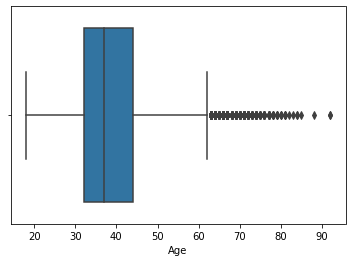

In [295]:
sns.boxplot(data['Age'])

In [296]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

#### `finding quartiles to detect outliers`

In [297]:
q1=np.percentile(data['Age'],25)
q3=np.percentile(data['Age'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value

In [298]:
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: 14.0
Upper Bound: 62.0


 #### `replacing outliers by upper_bound`

In [299]:
data.loc[data.Age > upper_bound, 'Age'] = upper_bound    

In [300]:
data[data['Age'] > upper_bound]['Age']

Series([], Name: Age, dtype: float64)

<AxesSubplot:xlabel='Age'>

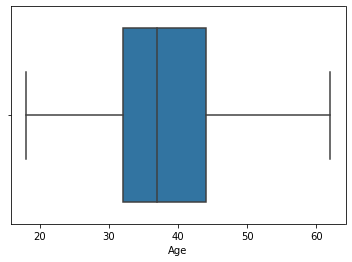

In [301]:
sns.boxplot(data['Age'])

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Density'>

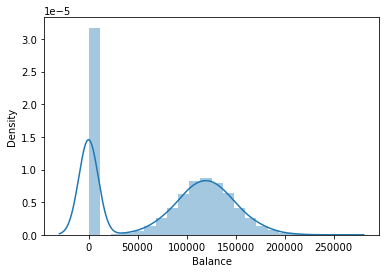

In [302]:
sns.distplot(data['Balance'])

<AxesSubplot:xlabel='Balance'>

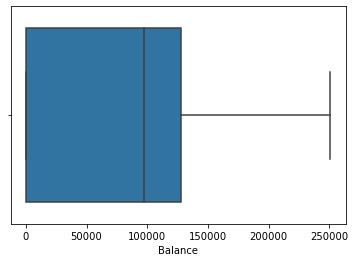

In [303]:
sns.boxplot(data['Balance'])

In [304]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

#### `Zero Bank Balance`

In [305]:
data[data['Balance'] == 0].shape

(3617, 12)

In [306]:
data['Balance'].shape

(10000,)

In [307]:
total_percentage_of_customers_having_zero_balance=3617/100
print(f'{total_percentage_of_customers_having_zero_balance}%')

36.17%


#### `36.17% customers do not have any money in there bank balance`

### Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

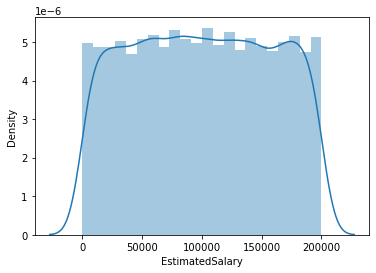

In [308]:
sns.distplot(data['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary'>

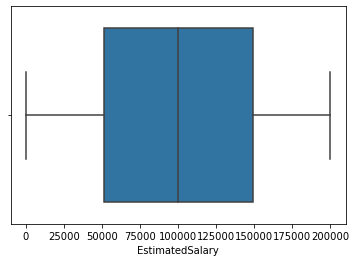

In [309]:
sns.boxplot(data['EstimatedSalary'])

In [310]:
data['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### `Uniformly Distributed Estimated Salary`

------

----------

## `Bivariate Analysis between all columns, useful for Feature Engineering and Feature Selection`

-----------

### `Hypothesis testing On Churn Modeling Dataset`

### `Cat vs Cat : Chi-Square Test`

### 1. Geography vs Gender

In [311]:
two_way_frquency=pd.crosstab(data['Geography'],data['Gender'])
two_way_frquency

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [312]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [313]:
p_value   # p-value < 0.05 --- accept alternate hypothesis

0.03145869671789379

#### `Geography and Gender are related`

### 2. HasCrCard vs Gender

In [314]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Gender'])
two_way_frquency

Gender,Female,Male
HasCrCard,,
0,1351,1594
1,3192,3863


In [315]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [316]:
p_value  # p_value > 0.05 -------- accept null hypothesis

0.5791808600631774

#### `HasCrCard and Gender are not related`

### 3. IsActiveMember vs Gender

In [317]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Gender'])
two_way_frquency

Gender,Female,Male
IsActiveMember,,
0,2259,2590
1,2284,2867


In [318]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [319]:
p_value # p-value < .05 ---- accept alternate hypothesis

0.02546076070719631

#### `Gender and IsActive Member are not related`

### 4. Geography vs Exited

In [320]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [321]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [322]:
p_value # p-value < .05 ---- accept alternate hypothesis

3.8303176053541544e-66

#### `Geography and Exited are related`

---

### `Num vs Num : Correlation Test`

### 1. Age vs CreditScore

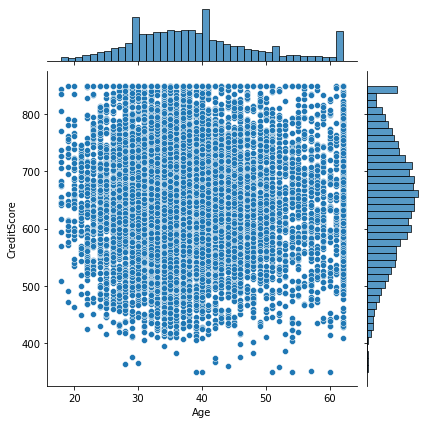

In [323]:
sns.jointplot('Age','CreditScore',data=data)

In [324]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['CreditScore'])

In [325]:
correlation    # weak or no association

-0.00795241370675448

In [326]:
p_value    # accept null hypothesis 

0.42652361689797036

#### `Age and CreditScore are not related`

### 2. Age vs Balance

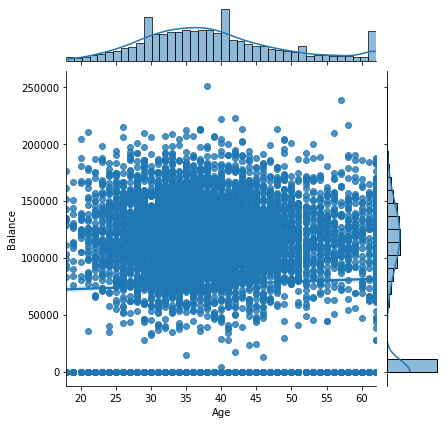

In [327]:
sns.jointplot('Age','Balance',data=data,kind='reg')

In [328]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['Balance'])

In [329]:
p_value   # reject null hypothesis

0.0009578283702003664

In [330]:
correlation   # weak association

0.033021417258140354

#### `Age and Balance are related`

### 3. EsimatedSalary vs Balance

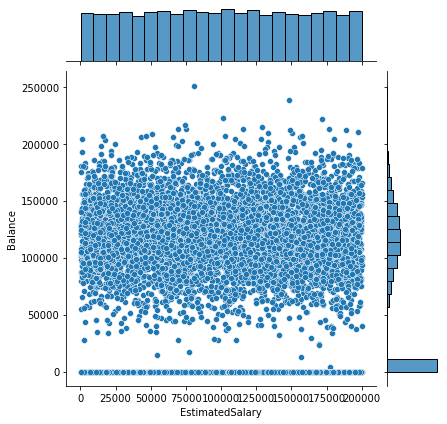

In [331]:
sns.jointplot('EstimatedSalary','Balance',data=data)

In [332]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['Balance'])

In [333]:
correlation   # weak association

0.012797496340555697

In [334]:
p_value    # accept null hypothesis

0.20067105296691892

#### `EstimatedSalary and Balance are not related`

### 4. CreditScore vs EstimatedSalary

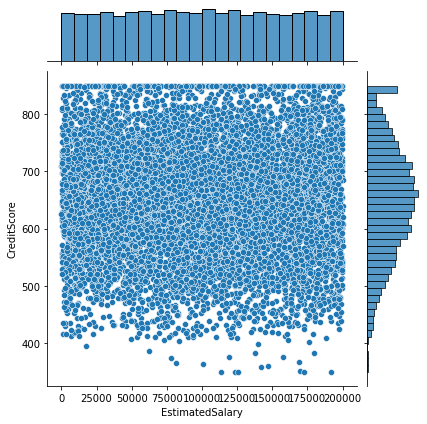

In [335]:
sns.jointplot('EstimatedSalary','CreditScore',data=data)

In [336]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['CreditScore'])

In [337]:
correlation

-0.001384292867984519

In [338]:
p_value    # accept null hypothesis

0.8899147753848302

#### `EstimatedSalary and CreditScore are not related`

### 5. CreditScore Vs Balance

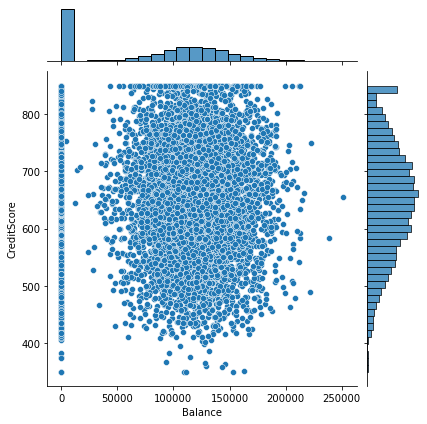

In [339]:
sns.jointplot('Balance','CreditScore',data=data)

In [340]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Balance'],data['CreditScore'])

In [341]:
correlation

0.006268381616008729

In [342]:
p_value   # Accept null hypothesis

0.5308126602914696

#### `Balance and CreditScore are not related`

---

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


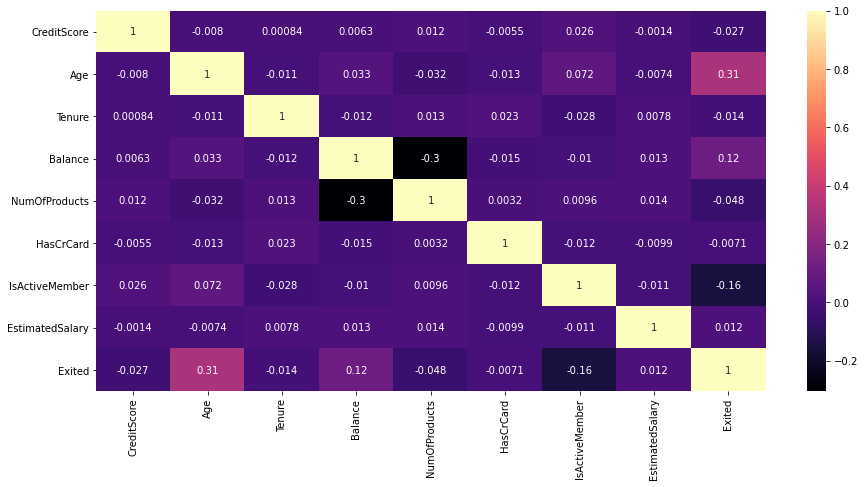

In [343]:
plt.figure(figsize=(15,7))
corr_mat = data.corr()

sns.heatmap(corr_mat,annot=True,cmap='magma')
plt.show()

## `Cat vs Num : T and Anova Test`

--------

## `EstimatedSalary`

### vs Gender 

In [344]:
grp_female = data.loc[data["Gender"]=='Female','EstimatedSalary']
grp_male = data.loc[data["Gender"]=='Male','EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.8111794562250657, pvalue=0.4172819312945406)

#### `EstimatedSalary and Balance are not related`

### vs HasCrCard

In [345]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'EstimatedSalary']
no_CrCard = data.loc[data["HasCrCard"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.9932911327221926, pvalue=0.32059213597636266)

#### `HasCrCard and EstimatedSalary are not related`

### vs IsActiveMember

In [346]:
yes_active = data.loc[data["IsActiveMember"]==1,'EstimatedSalary']
no_active = data.loc[data["IsActiveMember"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-1.1421033240697918, pvalue=0.2534384248255728)

#### `IsActiveMember and EstimatedSalary are not related`

### vs Exited

In [347]:
yes_churn = data.loc[data["Exited"]==1,'EstimatedSalary']
no_churn = data.loc[data["Exited"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=1.2096536380192642, pvalue=0.22644042802223346)

#### `Exited and EstimatedSalary are not related`

### vs No Of Products

In [348]:
grp_1 = data.loc[data["NumOfProducts"]==1,'EstimatedSalary']
grp_2 = data.loc[data["NumOfProducts"]==2,'EstimatedSalary']
grp_3 = data.loc[data["NumOfProducts"]==3,'EstimatedSalary']
grp_4 = data.loc[data["NumOfProducts"]==4,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.8580723754477232, pvalue=0.46206337047894386)

#### `No of Products and EstimatedSalary are not related`

### vs Geography 

In [349]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.5827609114534064, pvalue=0.5583736355799094)

#### ` Geography and EstimatedSalary are not related`

### vs Tenure

In [350]:
grp_0 = data.loc[data["Tenure"]==0,'EstimatedSalary']
grp_1 = data.loc[data["Tenure"]==1,'EstimatedSalary']
grp_2 = data.loc[data["Tenure"]==2,'EstimatedSalary']
grp_3 = data.loc[data["Tenure"]==3,'EstimatedSalary']
grp_4 = data.loc[data["Tenure"]==4,'EstimatedSalary']
grp_5 = data.loc[data["Tenure"]==5,'EstimatedSalary']
grp_6 = data.loc[data["Tenure"]==6,'EstimatedSalary']
grp_7 = data.loc[data["Tenure"]==7,'EstimatedSalary']
grp_8 = data.loc[data["Tenure"]==8,'EstimatedSalary']
grp_9 = data.loc[data["Tenure"]==9,'EstimatedSalary']
grp_10 = data.loc[data["Tenure"]==10,'EstimatedSalary']
grp_11 = data.loc[data["Tenure"]==11,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.613685551817579, pvalue=0.803587997402111)

#### ` Tenure and EstimatedSalary are not related`

---

## `Balance`

---

### vs Gender

In [351]:
grp_female = data.loc[data["Gender"]=='Female','Balance']
grp_male = data.loc[data["Gender"]=='Male','Balance']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=-1.2086242759422712, pvalue=0.22683580909200307)

#### `Balance and Gender are not related`

### vs HasCrCard

In [352]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Balance']
no_CrCard = data.loc[data["HasCrCard"]==0,'Balance']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.4858499284862743, pvalue=0.13735035051188188)

#### `Balance and HasCrCard are not related`

### vs IsActiveMember

In [353]:
yes_active = data.loc[data["IsActiveMember"]==1,'Balance']
no_active = data.loc[data["IsActiveMember"]==0,'Balance']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-1.0083604687166907, pvalue=0.31330584623768265)

#### `Balance and IsActiveMember are not related`

### vs Exited

In [354]:
yes_churn = data.loc[data["Exited"]==1,'Balance']
no_churn = data.loc[data["Exited"]==0,'Balance']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=11.936240300013841, pvalue=1.2755633191525477e-32)

#### `Balance and Exited are related`

### vs NoOfProducts

In [355]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Balance']
grp_2 = data.loc[data["NumOfProducts"]==2,'Balance']
grp_3 = data.loc[data["NumOfProducts"]==3,'Balance']
grp_4 = data.loc[data["NumOfProducts"]==4,'Balance']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=521.9871533041903, pvalue=3.6991202e-315)

#### `Balance and NoOfProducts are related`

### vs Geography

In [356]:
grp_france = data.loc[data["Geography"]=='France','Balance']
grp_germany = data.loc[data["Geography"]=='Germany','Balance']
grp_spain = data.loc[data["Geography"]=='Spain','Balance']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=958.4254463368385, pvalue=0.0)

#### `Balance and Geography are related`

### vs Tenure

In [357]:
grp_0 = data.loc[data["Tenure"]==0,'Balance']
grp_1 = data.loc[data["Tenure"]==1,'Balance']
grp_2 = data.loc[data["Tenure"]==2,'Balance']
grp_3 = data.loc[data["Tenure"]==3,'Balance']
grp_4 = data.loc[data["Tenure"]==4,'Balance']
grp_5 = data.loc[data["Tenure"]==5,'Balance']
grp_6 = data.loc[data["Tenure"]==6,'Balance']
grp_7 = data.loc[data["Tenure"]==7,'Balance']
grp_8 = data.loc[data["Tenure"]==8,'Balance']
grp_9 = data.loc[data["Tenure"]==9,'Balance']
grp_10 = data.loc[data["Tenure"]==10,'Balance']
grp_11 = data.loc[data["Tenure"]==11,'Balance']

In [358]:
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.6935811144374311, pvalue=0.7314558778094197)

#### `Balance and Tenure are related`

---

## `Age`

---

### vs Gender

In [359]:
grp_female = data.loc[data["Gender"]=='Female','Age']
grp_male = data.loc[data["Gender"]=='Male','Age']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=2.8961838232024695, pvalue=0.0037854989344916767)

#### `Age and Gender are related`

### vs HasCrCard

In [360]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Age']
no_CrCard = data.loc[data["HasCrCard"]==0,'Age']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.2716566196095227, pvalue=0.203524729984587)

#### `Age and HasCrCard are not related`

### vs IsActiveMember

In [361]:
yes_active = data.loc[data["IsActiveMember"]==1,'Age']
no_active = data.loc[data["IsActiveMember"]==0,'Age']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=7.263906412618832, pvalue=4.041364570154806e-13)

#### `Age and IsActiveMember are related`

### vs Exited

In [362]:
yes_churn = data.loc[data["Exited"]==1,'Age']
no_churn = data.loc[data["Exited"]==0,'Age']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=32.88677660692836, pvalue=2.5610544037367625e-225)

#### `Age and Exited are related`

### vs NoOfProducts

In [363]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Age']
grp_2 = data.loc[data["NumOfProducts"]==2,'Age']
grp_3 = data.loc[data["NumOfProducts"]==3,'Age']
grp_4 = data.loc[data["NumOfProducts"]==4,'Age']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=60.27159544391257, pvalue=1.3077780175644288e-38)

#### `Age and NumOfProducts are related`

### vs Geography

In [364]:
grp_france = data.loc[data["Geography"]=='France','Age']
grp_germany = data.loc[data["Geography"]=='Germany','Age']
grp_spain = data.loc[data["Geography"]=='Spain','Age']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=14.299617537901918, pvalue=6.289573291620452e-07)

#### `Age and Geography are related`

### vs Tenure

In [365]:
grp_0 = data.loc[data["Tenure"]==0,'Age']
grp_1 = data.loc[data["Tenure"]==1,'Age']
grp_2 = data.loc[data["Tenure"]==2,'Age']
grp_3 = data.loc[data["Tenure"]==3,'Age']
grp_4 = data.loc[data["Tenure"]==4,'Age']
grp_5 = data.loc[data["Tenure"]==5,'Age']
grp_6 = data.loc[data["Tenure"]==6,'Age']
grp_7 = data.loc[data["Tenure"]==7,'Age']
grp_8 = data.loc[data["Tenure"]==8,'Age']
grp_9 = data.loc[data["Tenure"]==9,'Age']
grp_10 = data.loc[data["Tenure"]==10,'Age']
grp_11 = data.loc[data["Tenure"]==11,'Age']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=1.4265938488961298, pvalue=0.16139581440398384)

#### `Age and Tenure are not related`

## `CreditScore`

### vs Gender

In [366]:
grp_female = data.loc[data["Gender"]=='Female','CreditScore']
grp_male = data.loc[data["Gender"]=='Male','CreditScore']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.2856346098463999, pvalue=0.7751639097068665)

#### `CredirScore and Gender are not related`

### vs HasCrCard

In [367]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'CreditScore']
no_CrCard = data.loc[data["HasCrCard"]==0,'CreditScore']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.5458017530613644, pvalue=0.5852143953187045)

#### `CreditScore and HasCrCard are not related`

### vs IsActiveMember

In [368]:
yes_active = data.loc[data["IsActiveMember"]==1,'CreditScore']
no_active = data.loc[data["IsActiveMember"]==0,'CreditScore']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=2.5657200507183093, pvalue=0.010310632507972201)

#### `CreditScore and IsActiveMember are not related`

### vs Exited

In [369]:
yes_churn = data.loc[data["Exited"]==1,'CreditScore']
no_churn = data.loc[data["Exited"]==0,'CreditScore']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=-2.7100778888729833, pvalue=0.006738213892192373)

#### `CreditScore and Exited are not related`

### NumOfProducts

In [370]:
grp_1 = data.loc[data["NumOfProducts"]==1,'CreditScore']
grp_2 = data.loc[data["NumOfProducts"]==2,'CreditScore']
grp_3 = data.loc[data["NumOfProducts"]==3,'CreditScore']
grp_4 = data.loc[data["NumOfProducts"]==4,'CreditScore']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.8864761142070923, pvalue=0.4472040985916901)

#### `CreditScore and NumOfProducts are not related`

### vs Geography

In [371]:
grp_france = data.loc[data["Geography"]=='France','CreditScore']
grp_germany = data.loc[data["Geography"]=='Germany','CreditScore']
grp_spain = data.loc[data["Geography"]=='Spain','CreditScore']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.39941989894651797, pvalue=0.6707197151786737)

#### `CreditScore and Geography are not related`

### vs Tenure

In [372]:
grp_0 = data.loc[data["Tenure"]==0,'CreditScore']
grp_1 = data.loc[data["Tenure"]==1,'CreditScore']
grp_2 = data.loc[data["Tenure"]==2,'CreditScore']
grp_3 = data.loc[data["Tenure"]==3,'CreditScore']
grp_4 = data.loc[data["Tenure"]==4,'CreditScore']
grp_5 = data.loc[data["Tenure"]==5,'CreditScore']
grp_6 = data.loc[data["Tenure"]==6,'CreditScore']
grp_7 = data.loc[data["Tenure"]==7,'CreditScore']
grp_8 = data.loc[data["Tenure"]==8,'CreditScore']
grp_9 = data.loc[data["Tenure"]==9,'CreditScore']
grp_10 = data.loc[data["Tenure"]==10,'CreditScore']
grp_11 = data.loc[data["Tenure"]==11,'CreditScore']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.4641679040515924, pvalue=0.9137480759686244)

#### `CreditScore and Tenure are not related`

## `Conclusion`:
### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`

-------

## `Bivariate Analysis regarding Target variable i.e Exited`


### CreditScore vs Exited

In [373]:
grp_retained = data.loc[data["Exited"]==0,'CreditScore']
grp_closed = data.loc[data["Exited"]==1,'CreditScore']

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

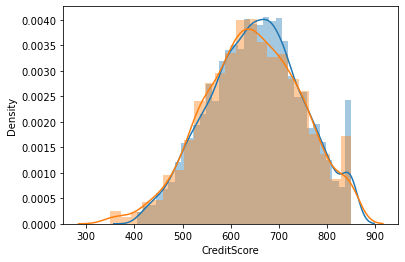

In [374]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [375]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [376]:
ttest_results

Ttest_indResult(statistic=2.7100778888729833, pvalue=0.006738213892192373)

In [377]:
## pvalue < 0.05 Reject null hypothesis

### `CreditScore and exited are related`

### Geography vs Exited

In [378]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [379]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [380]:
p_value

3.8303176053541544e-66

In [381]:
## pvalue < 0.05 Reject null hypothesis

### `Geography and exited are related`

### Gender vs Exited

In [382]:
two_way_frquency=pd.crosstab(data['Gender'],data['Exited'])
two_way_frquency

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [383]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [384]:
p_value

2.2482100097131755e-26

In [385]:
## pvalue < 0.05 Reject null hypothesis

### `Gender and exited are related`

### Age vs Exited

In [386]:
grp_retained = data.loc[data["Exited"]==0,'Age']
grp_closed = data.loc[data["Exited"]==1,'Age']

<AxesSubplot:xlabel='Age', ylabel='Density'>

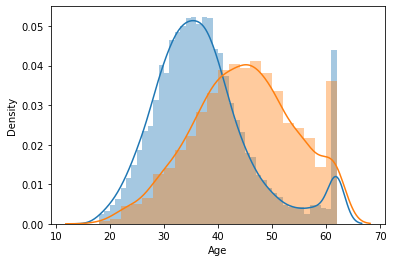

In [387]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [388]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [389]:
ttest_results

Ttest_indResult(statistic=-32.88677660692836, pvalue=2.5610544037367625e-225)

In [390]:
## pvalue < 0.05 Reject null hypothesis

### `Age and exited are related`

In [391]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [392]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

### Tenure vs Exited - `( Chi Square )`

In [393]:
two_way_frquency=pd.crosstab(data['Tenure'],data['Exited'])
two_way_frquency

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [394]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [395]:
p_value

0.17758462026413294

In [396]:
## p_value > 0.05  Reject Null Hypothesis

### `Tenure and exited are related`

### Gender, Geography vs Exited ( 2 way Anova )

In [397]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [398]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('Exited ~ Gender + Geography + Gender:Geography', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,16.983218,1.0,109.079287,2.106611e-25
Geography,47.446574,2.0,152.369197,6.542250e-66
Gender:Geography,0.187716,2.0,0.602828,5.472816e-01
Residual,1556.026650,9994.0,NaN,NaN


#### Since the p-values for Gender and Geography are both less than .05, this means that both factors have a statistically significant effect on Exited.

# End -----------------------------------